In [14]:
import pandas as pd
import numpy as np
import matplotlib,pylab as plt 

In [15]:
g=pd.read_csv("glass.csv")

In [16]:
g.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
df=pd.DataFrame(g)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
train,test = train_test_split(df,test_size = 0.2)

In [48]:
neigh = KNC(n_neighbors= 2)

In [49]:
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [50]:
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])

In [51]:
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
test_acc


0.6744186046511628

In [52]:
acc = []
for i in range(2,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])


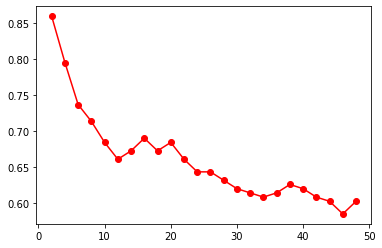

In [53]:
plt.plot(np.arange(2,50,2),[i[0] for i in acc],"ro-")

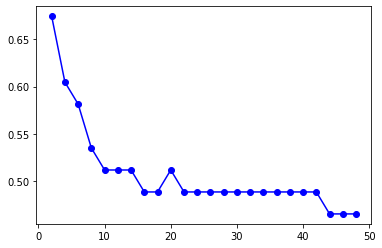

In [54]:
plt.plot(np.arange(2,50,2),[i[1] for i in acc],"bo-")